Let's try to solve the beam equation with Julia DifferentalEquations.jl package

Let's first compare the plots we found by hand and the ones found by integrating with boundary conditions

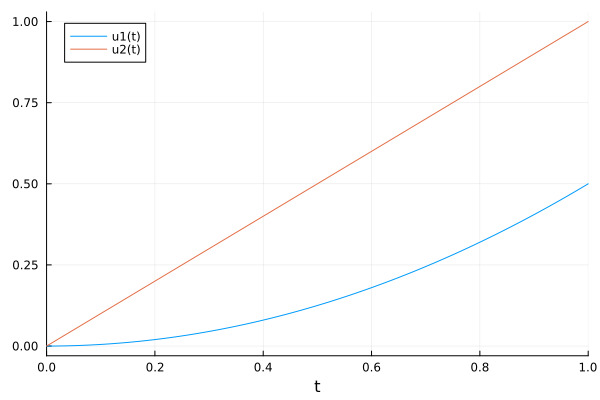

In [143]:
using Plots
using DifferentialEquations

EJ=1
M(x)=-1;


function poisson!(du,u,p,x)
    du[1]=u[2]
    du[2]=-M(x)/EJ
end

function bc!(r,u,p,t)
    r[1] = u[1][1]
    r[2] = u[2][1]
end

xspan=(0.0 , 1.0)


bvp= BVProblem(poisson!,bc!,[0,0],xspan)
u_sol= solve(bvp,BS3(),dt=0.005)

plot(u_sol)

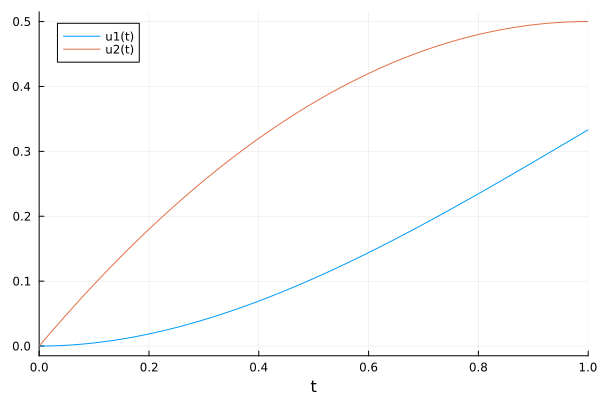

In [141]:
using Plots
using DifferentialEquations

EJ=1
F=1
M(x)=-F/EJ *(1-x);


function poisson!(du,u,p,x)
    du[1]=u[2]
    du[2]=-M(x)
end

function bc!(r,u,p,x)
    r[1] = u[1][1]
    r[2] = u[2][1]
end

xspan=(0.0 , 1.0)


bvp= BVProblem(poisson!,bc!,[0,0],xspan)
u_sol= solve(bvp,BS3(),saveat = 0.01)

plot(u_sol)

up to the fourth derivative

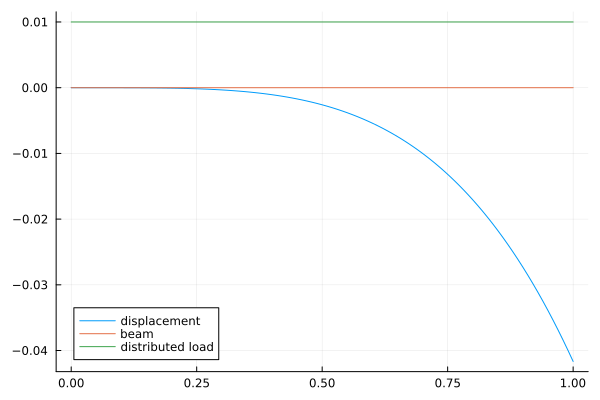

In [142]:
using Plots
using DifferentialEquations

q(x)=1
EJ=1

xspan=(0.0 , 1.0)

f(x)=q(x)/EJ



function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end



function bc!(r,u,p,x)
    r[1]= u[1][1]
    r[2]= u[1][1]
    r[3]= u[3][end]
    r[4]= u[3][end]
end



bvp= BVProblem(beam!,bc!,[0,0,0,0],xspan)
u_sol= solve(bvp,BS3(),saveat = 0.01)



plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")





!!! doesn't correctly compiles the boundary conditions